# Data Wrangling We Rate Dogs

In [123]:
import pandas as pd
import os
import requests
import numpy as np
import json
import re
import matplotlib.pyplot as plt

## Gather

In [41]:
# importando dados de multiplas fontes para analise

# twitter_archive_enhanced.csv
tae_df = pd.read_csv('fonts/twitter-archive-enhanced.csv')

# image_predictions.tsv
folder_name = 'fonts'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name,
                           url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
ip_df = pd.read_csv('fonts/image-predictions.tsv', sep= '\t')

# twwepy
import tweepy

consumer_key = 'XXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in tae_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue
            
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

tweet_info_df = pd.DataFrame()
tweet_info_df['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [47]:
tweet_info_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8795,39370
1,892177421306343426,6448,33698
2,891815181378084864,4273,25394
3,891689557279858688,8884,42743
4,891327558926688256,9668,40904


## Assess

In [48]:
tae_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
140,865006731092295680,NaN,NaN,2017-05-18 00:50:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nelly. He really hopes you like his Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865006731...,13,10,Nelly,None,None,None,None
1866,675349384339542016,6.749998e+17,4.196984e+09,2015-12-11 16:20:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I lied. Here's more. All 13/10 https://t.c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675349384...,13,10,None,None,None,None,None
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,10,10,None,None,None,None,None
626,795076730285391872,NaN,NaN,2016-11-06 01:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She loves going down slides bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,None,None,None,None
2218,668507509523615744,NaN,NaN,2015-11-22 19:13:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668507509...,10,10,a,None,None,None,None
1121,730924654643314689,NaN,NaN,2016-05-13 00:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending non-canine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730924654...,9,10,unacceptable,None,None,None,None
570,801854953262350336,8.018543e+17,1.185634e+07,2016-11-24 18:28:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
675,789530877013393408,NaN,NaN,2016-10-21 18:16:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzy. She smiles a lot. 12/10 contagi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None
1573,687494652870668288,NaN,NaN,2016-01-14 04:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marq. He stole this car. 7/10 wtf Marq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687494652...,7,10,Marq,None,None,None,None
644,793180763617361921,NaN,NaN,2016-10-31 20:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Newt. He's a strawberry. 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793180763...,11,10,Newt,None,None,None,None


In [49]:
# verificar nomes estranhos
tae_df[tae_df['name'].str.islower()]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [50]:
# verificar todos os valores de 'source'
tae_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [51]:
tae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [52]:
tae_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [53]:
sum(tae_df['tweet_id'].duplicated())

0

In [54]:
ip_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,doormat,0.201058,False,turnstile,0.088583,False,carton,0.082924,False
2011,879008229531029506,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,American_Staffordshire_terrier,0.008711,True
61,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,0.062050,True
380,673295268553605120,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,1,golden_retriever,0.889241,True,Labrador_retriever,0.064683,True,Great_Pyrenees,0.012613,True
1794,831309418084069378,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,1,Doberman,0.369389,True,kelpie,0.132449,True,Labrador_retriever,0.074727,True
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False
1459,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
645,681610798867845120,https://pbs.twimg.com/media/CXWRZBgWkAEHMea.jpg,1,toy_poodle,0.821704,True,miniature_poodle,0.116042,True,Yorkshire_terrier,0.014847,True
481,675362609739206656,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,Labrador_retriever,0.479008,True,ice_bear,0.218289,False,kuvasz,0.139911,True
637,681261549936340994,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,0.065738,True


In [55]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [56]:
sum(ip_df['tweet_id'].duplicated())

0

In [57]:
#checando se tem imagens nulas
sum(ip_df['jpg_url'].isnull())

0

In [58]:
tweet_info_df.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8795,39370
1,892177421306343426,6448,33698
2,891815181378084864,4273,25394
3,891689557279858688,8884,42743
4,891327558926688256,9668,40904


In [59]:
tweet_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 3 columns):
id                2110 non-null int64
retweet_count     2110 non-null int64
favorite_count    2110 non-null int64
dtypes: int64(3)
memory usage: 49.5 KB


In [60]:
tweet_info_df.describe()

,id,retweet_count,favorite_count
count,2.110000e+03,2110.000000,2110.000000
mean,7.509845e+17,3401.553081,8902.798104
std,6.720773e+16,5320.845414,12391.223717
min,6.704283e+17,0.000000,0.000000
25%,6.867356e+17,789.250000,2038.500000
50%,7.413711e+17,1719.000000,4163.500000
75%,8.080802e+17,3881.750000,11250.000000
max,8.924206e+17,78839.000000,131922.000000


### Problemas de Qualidade

#### twitter_archive_enhanced
<ol>
    <li>A coluna source está com a tag html junto, com outras informações do link</li>
    <li>Existem nomes estranhos, todos eles estão em minusculos como 'such', 'a', 'quite', 'not', 'one', 'incredibly',        'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space' e existem nomes escritos errados como 'Carll' e 'Bradlay' </li>
    <li>Os nomes nulos na coluna name estão preenchidos como 'None', assim o python não vai recohecer que o dado é nulo</li>
    <li>Existem retweets que devem ser excluidos</li>
    <li>As colunas de timestamp estão como string, assim vai ser complicado trabalhar com as datas</li>
    <li>Alguns itens da coluna text possuem caracteres desnecessarios junto com o '&', como "& amp"</li>
</ol>

#### image_predictions
<ol start='7'>
    <li>Existem imagens que estão coma string incompleta, então não tem imagem</li>
    <li>Os nomes dos cachorros (p1,p2,p3) estão todos desformatados, sem nenhum padrão</li>
</ol>

### Problemas de arrumação

#### twitter_archive_enhanced
<ol>
    <li>As colunas doggo, floofer, pupper, puppo não precisam ser tabelas</li>
</ol>

#### image_predictions
<ol>
    <li>Toda a coluna de predição e o json poderia estar colada com o arquivo csv</li>
</ol>

## Clean

In [61]:
# Copy the files
tae_df_clean = tae_df.copy()
ip_df_clean = ip_df.copy()
tweet_info_df_clean = tweet_info_df.copy()

#### Define

<ol>
    <li>Corrigir a coluna source removendo as tagas html e só deixando os links</li>
    <li>Corrigir nomes estranhos na coluna nome por nulos quando não são nomes ou corrigir os nomes</li>
    <li>Substituir o 'None' na coluna nome por nulos</li>
    <li>Filtrar por tweets originais eliminando os retweets vendo se o texto contem RT</li>
    <li>Trocar o tipo de dado da coluna 'timestamp' para datetime</li>
    <li>Retirar os caracteres desnecessarios juntos do '&'</li>
    <li>Excluir os tweets com o link de imagens incompleto</li>
    <li>Corrigir a formatação dos dados da coluna de predição, deixando em maiusculo e removendo o caracter '_'</li>
</ol>

<ol>
    <li>Transformar as colunas doggo, floofer, pupper, puppo em uma unica tabela "Estagio"</li>
</ol>

#### Code

In [62]:
# 1.Corrigir a coluna source removendo as tagas html e só deixando os links
from bs4 import BeautifulSoup
for value in tae_df_clean['source'].unique():
    if value.find('href') != -1:
        html = value
        soup = BeautifulSoup(html, "lxml")
        tae_df_clean['source'].replace(value, soup.find('a', href=True)['href'], inplace=True)

In [63]:
#2.Corrigir nomes estranhos na coluna nome por nulos quando não são nomes ou corrigir os nomes
for name in tae_df_clean.query('name.notnull()', engine='python')[tae_df_clean['name'].str.islower()]['name'].unique():
    tae_df_clean['name'].replace(name, np.NaN, inplace=True)
    
tae_df_clean['name'].replace('Carll', 'Carl', inplace=True)
tae_df_clean['name'].replace('Bradlay', 'Bradley', inplace=True)

In [64]:
#3.Substituir o 'None' na coluna nome por nulos
tae_df_clean['name'].replace('None', np.NaN, inplace=True)

In [65]:
#4.Excluir Retweets
tae_df_clean = tae_df_clean[tae_df_clean['text'].str.contains("RT ") == False]

In [66]:
#5. Alterar o tipo da variavel da coluna timestamp
tae_df_clean['timestamp'] = pd.to_datetime(tae_df_clean['timestamp'])

In [67]:
#6. Remover o '&amp' dos dados de texto
tae_df_clean['text'] = tae_df_clean['text'].str.replace('&amp', '&')

In [68]:
#7.Excluir os tweets com o link de imagens incompleto
tweets_ids = ip_df_clean[ip_df_clean['jpg_url'].str.contains('jpg') == False]['tweet_id']
ip_df_clean = ip_df_clean[ip_df_clean['jpg_url'].str.contains('jpg') == True]
tae_df_clean = tae_df_clean[~tae_df_clean['tweet_id'].isin(tweets_ids)]

In [69]:
#8. Padronizar o nome das predições
ip_df_clean['p1'] = ip_df_clean['p1'].str.title()
ip_df_clean['p1'] = ip_df_clean['p1'].str.replace('_',' ')

ip_df_clean['p2'] = ip_df_clean['p2'].str.title()
ip_df_clean['p2'] = ip_df_clean['p2'].str.replace('_',' ')

ip_df_clean['p3'] = ip_df_clean['p3'].str.title()
ip_df_clean['p3'] = ip_df_clean['p3'].str.replace('_',' ')

In [70]:
# 2.1 Transformar as colunas dogoo, floffer, pupper e puppo em uma unica
tae_df_clean['Estagio'] = tae_df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

columns = ['doggo', 'floofer', 'pupper', 'puppo']
tae_df_clean = tae_df_clean.drop(columns, axis=1)

In [71]:
# 2.2 Adicionar o arquivo de predição e o json no arquivo de tweets
tae_df_clean = pd.merge(left=tae_df_clean, right=tweet_info_df_clean, left_on='tweet_id', right_on='id', how='inner')
tae_df_clean = tae_df_clean.merge(ip_df_clean, on='tweet_id', how='inner')
tae_df_clean = tae_df_clean.drop('id', axis=1)

#### Test

In [72]:
# 1.Corrigir a coluna source removendo as tagas html e só deixando os links
tae_df_clean['source'].unique()

array(['http://twitter.com/download/iphone', 'http://twitter.com',
       'https://about.twitter.com/products/tweetdeck'], dtype=object)

In [73]:
#2.Substituir o 'None' na coluna nome por nulos
tae_df_clean.query('name == "None"')['name'].count()

0

In [74]:
#3.Corrigir nomes estranhos na coluna nome por nulos
wrong_names = ['Carll', 'Bradlay']
sum(tae_df_clean['name'].isin(wrong_names))

0

In [75]:
#4.Excluir Retweets
sum(tae_df_clean['retweeted_status_user_id'].notnull())

0

In [76]:
tae_df_clean[tae_df_clean['text'].str.contains("RT ") == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [77]:
#.5 Alterar o tipo da variavel da coluna timestamp
tae_df_clean['timestamp'].describe()

count                    1756
unique                   1756
top       2016-08-04 22:52:29
freq                        1
first     2015-11-28 02:25:32
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

In [78]:
#6. Remover o '&amp' dos dados de texto
tae_df_clean[tae_df_clean['text'].str.contains('&amp') == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [79]:
#7.Excluir os tweets com o link de imagens incompleto
ip_df_clean[ip_df_clean['jpg_url'].str.contains('.jpg') == False].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [80]:
#.8 Padronizar os nomes das predições
sum(ip_df_clean['p1'].str.contains("_") == True)

0

In [81]:
sum(ip_df_clean['p2'].str.contains("_") == True)

0

In [82]:
sum(ip_df_clean['p3'].str.contains("_") == True)

0

In [83]:
#2.1 Verificar se as colunas foram colocadas corretamente
tae_df_clean['Estagio'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [84]:
tae_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1756 entries, 0 to 1755
Data columns (total 27 columns):
tweet_id                      1756 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     1756 non-null datetime64[ns]
source                        1756 non-null object
text                          1756 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1756 non-null object
rating_numerator              1756 non-null int64
rating_denominator            1756 non-null int64
name                          1227 non-null object
Estagio                       323 non-null object
retweet_count                 1756 non-null int64
favorite_count                1756 non-null int64
jpg_url                       1756 non-null object
img_num                       175

## Store

In [85]:
# Armazenar o dataframe limpo em um arquivo .csv
tae_df_clean.to_csv('twitter_archive_master.csv')

## Analisys

In [154]:
# analise 1. ver qual a porcentagem de pessoas que colocaram imagens que não são de cachorro
tae_predict = tae_df_clean[~tae_df_clean["p1_dog"]]
tae_predict = tae_predict[~tae_predict["p2_dog"]]
tae_predict = tae_predict[~tae_predict["p3_dog"]]
predict_count_notdog = tae_predict["tweet_id"].count()

In [155]:
tweet_count = tae_df_clean["tweet_id"].count()

In [156]:
display((predict_count_notdog * 100) / tweet_count)

14.464692482915718

In [122]:
# analise 2. qual foi o tweet de cachorro é o mais favoritado
tae_df_clean.loc[tae_df_clean["rating_numerator"].idxmax()]

tweet_id                                                     749981277374128128
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-07-04 15:00:45
source                             https://about.twitter.com/products/tweetdeck
text                          This is Atticus. He's quite simply America af....
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/749981277...
rating_numerator                                                           1776
rating_denominator                                                           10
name                                    

In [146]:
# analise 3. qual o estagio de caes que teve a melhor avaliação
tae_estagio = tae_df_clean.groupby(['Estagio'])['rating_numerator'].max()
tae_estagio

Estagio
doggo      204
floofer     13
pupper     143
puppo       14
Name: rating_numerator, dtype: int64

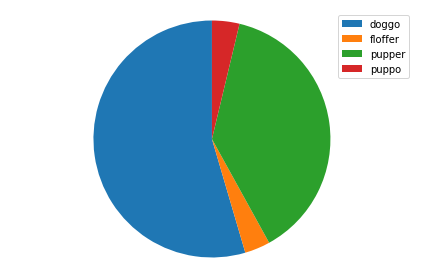

In [153]:
legend = ['doggo', 'floffer', 'pupper', 'puppo']
patches, text = plt.pie(tae_estagio, startangle=90)
plt.legend(patches, legend, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()